### Imports

In [56]:
import numpy as np
from numpy.random import normal
import scipy
import pandas as pd
import seaborn as sns
import sys #sys.maxsize

### Data Generation

#### Helper Functions

In [57]:
def gen_points(n_points, x_center, y_center, spread, cluster_id):
    x0 = [1] * n_points
    x = normal(loc = x_center, scale = spread, size = n_points)
    y = normal(loc = y_center, scale = spread, size = n_points)
    c = [cluster_id] * n_points
    return list(zip(x0, x, y, c))

#### Configuration

In [58]:
cl_size = 50
cl_spread = 1
cl_centers = [(5, 5), (10, 10)]

#### DataFrame Generation

In [59]:
df = None
cols = ['x0', 'x', 'y', 'cluster_id']
for i, (c_x, c_y) in enumerate(cl_centers):
    points = gen_points(cl_size, c_x, c_y, cl_spread, i)                          
    if df is None:
        df = pd.DataFrame(points, columns = cols)
    else:
        df2 = pd.DataFrame(points, columns = cols)
        df = df.append(df2, ignore_index = True)

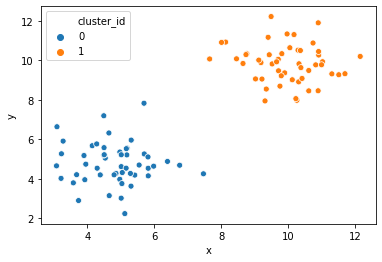

In [60]:
sns.scatterplot("x", "y", "cluster_id", data = df)

### Program

#### Prepare X, y from input; Initialize weights and bias

In [61]:
#inputs
X = df.loc[:, ['x0', 'x', 'y']].values
y = df.loc[:, 'cluster_id'].values
y = np.reshape(y, (2*cl_size, 1))
#initialize weights and biases to random values
#W[0] is the bias
W = normal(loc = 0, scale = 1, size = (3, 1))
print('X:', X.shape, 'y:', y.shape, 'W:', W.shape)

X: (100, 3) y: (100, 1) W: (3, 1)


#### Learning and Cost Functions Definition

In [62]:
def cost_and_gradient(X, y, W):
    Z = np.dot(X, W) #input to the activation function
    a = scipy.special.expit(Z) #activation
    gradient = np.dot(np.transpose(X), (a-y))
    #RuntimeWarning: divide by zero encountered in log
    #RuntimeWarning: invalid value encountered in multiply
    #use scipy.special to avoid divide-by-zero error - didn't work
    #try adding an infinitesimal number
    inf_small = 0.0000001
    #cost L
    L = (-1/(X.shape[0]))*np.sum((y*np.log(a+inf_small) + \
                        (1-y)*np.log(1-a+inf_small)))
    return L, gradient

In [63]:
#learning based on gradient descent
def gradient_descent(X, y, W, lrate = 0.01):
    W_new = W.copy()
    old_loss = sys.maxsize
    new_loss, grads = cost_and_gradient(X, y, W_new)
    #while the loss is reducing by a good enough margin
    i = 0 #for controlled printing
    while abs(old_loss - new_loss) > 0.0001:
        #update the weights and bias in the direction of the gradient
        W_new = W_new - (lrate*grads)
        #calculate the new loss
        old_loss = new_loss
        new_loss, grads = cost_and_gradient(X, y, W_new)
        if (i%75 == 0):
            print ('Loss:', new_loss)
        i += 1
        #print ('Loss:', new_loss)
    return W_new

#### Invocation

In [64]:
#call gradient descent to learn the new weights
W_new = gradient_descent(X, y, W, 0.0001)
print ('Old Weights:\n', W)
print ('New Weights:\n', W_new)
print ('Done')

Loss: 1.537314662937035
Loss: 0.5482945933466139
Loss: 0.5146666795413897
Loss: 0.4863231411435341
Loss: 0.46250142457019877
Loss: 0.4424334125768787
Loss: 0.4254058870587027
Loss: 0.41079726566904323
Loss: 0.39809157709467585
Loss: 0.3868758448277086
Loss: 0.3768281019591677
Loss: 0.3677018103377712
Loss: 0.35931030972526934
Loss: 0.35151310334185476
Old Weights:
 [[-1.29773899]
 [-0.88396623]
 [ 0.65477913]]
New Weights:
 [[-2.33434131]
 [ 0.10803132]
 [ 0.27578097]]
Done


#### Verification

In [65]:
def pred(X, W):
    return scipy.special.expit(np.dot(X, W))

y_pred = pred(X, W_new)
print(y_pred)
#print('Cluster 0:\n', y_pred[:10])
#print('Cluster 1:\n', y_pred[90:])

[[0.44039713]
 [0.41692515]
 [0.42090993]
 [0.43393964]
 [0.53406075]
 [0.47816669]
 [0.31557299]
 [0.2443543 ]
 [0.36382157]
 [0.35625363]
 [0.23835471]
 [0.42361522]
 [0.38946204]
 [0.33165415]
 [0.41292025]
 [0.28933196]
 [0.34773318]
 [0.4211918 ]
 [0.27733732]
 [0.33207188]
 [0.42667392]
 [0.45808345]
 [0.37346837]
 [0.35828494]
 [0.39820562]
 [0.27657787]
 [0.42672769]
 [0.42331764]
 [0.32833143]
 [0.39242457]
 [0.43775818]
 [0.41365939]
 [0.4713018 ]
 [0.34191777]
 [0.37023475]
 [0.35046073]
 [0.29410315]
 [0.37213223]
 [0.31901149]
 [0.30624266]
 [0.39985586]
 [0.43045073]
 [0.32044644]
 [0.38162892]
 [0.35487809]
 [0.41300951]
 [0.38868747]
 [0.608564  ]
 [0.39981329]
 [0.35509647]
 [0.84268577]
 [0.85734737]
 [0.80283528]
 [0.81649941]
 [0.82898335]
 [0.81278353]
 [0.83168064]
 [0.8070104 ]
 [0.77541638]
 [0.81584322]
 [0.80924937]
 [0.82224057]
 [0.75380983]
 [0.75881232]
 [0.76455127]
 [0.81223806]
 [0.80963162]
 [0.81125071]
 [0.82613079]
 [0.789143  ]
 [0.82361001]
 [0.89

#### Visualize Prediction

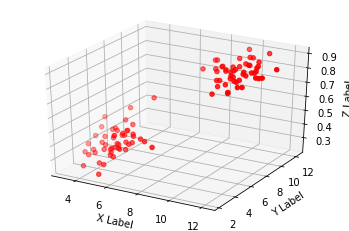

In [66]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = X[:,1]  #[1,2,3,4,5,6,7,8,9,10]
y = X[:,2]  #[5,6,2,3,13,4,1,2,4,8]
z = pred(X, W_new)       #[2,3,3,3,5,7,9,11,9,10]



ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()